In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
from matplotlib import pyplot as plt

In [2]:
basepath = './data'

In [3]:
# Area en km2
zona = gpd.read_file(os.path.join(basepath, 'Zonificacion/Zonificacion.shp'))
zona.fillna(0, inplace = True)
zona

,ID,AREA,ID_NODO,CODIGO_MZ,MPIO,POB2005,POB2010,POB2000,POB2012,VIAJES_AUT,VIAJES_TP,AreaHA,geometry
0,353,0.66,23070,353,Tonal,950.0,1097.0,547.0,1262.91,1270.0,1311.0,65.679518,"POLYGON ((-103.23486 20.66894, -103.23618 20.6..."
1,352,34.44,23043,352,Tonal,0.0,12275.0,698.0,13150.56,0.0,0.0,3405.625225,"MULTIPOLYGON (((-103.22730 20.67261, -103.2273..."
2,178,8.37,33263,178,Guada,46.0,46.0,0.0,46.00,0.0,0.0,827.453665,"POLYGON ((-103.26569 20.70559, -103.26580 20.7..."
3,205,136.13,1057,205,Juana,3696.0,3921.0,0.0,4015.00,0.0,169.0,13465.127422,"POLYGON ((-103.09714 20.53096, -103.09697 20.5..."
4,486,15.55,23383,486,Ext,0.0,0.0,0.0,0.00,2182.0,1204.0,1538.143448,"POLYGON ((-103.09714 20.53096, -103.09777 20.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,158,0.51,27449,158,Guada,10146.0,9805.0,11184.0,9550.70,2644.0,5504.0,50.319803,"POLYGON ((-103.37577 20.62992, -103.37549 20.6..."
474,165,0.67,12476,165,Guada,11694.0,10758.0,11516.0,10613.53,5127.0,7060.0,66.570406,"POLYGON ((-103.35993 20.62026, -103.35983 20.6..."
475,151,0.53,12445,151,Guada,6973.0,6734.0,7203.0,6643.93,3089.0,4687.0,52.177476,"POLYGON ((-103.34855 20.62832, -103.34726 20.6..."
476,492,74.37,20428,349,Tonal,16848.0,11736.0,1267.0,12573.11,3188.0,13649.0,7354.580057,"POLYGON ((-103.25581 20.55973, -103.25603 20.5..."


In [4]:
# TODO: hacer graficas de modalidad, obtener porcentajes de c/tipo
od = pd.read_excel(os.path.join(basepath, 'OD2007Estimacion2014.xlsx'))
od.drop([od.index[-1]], inplace = True)
od

,Origen,Destino,Caminando,Transporte Colectivo,Taxi,Bicicleta,Motocicleta,Auto (Conductor),Auto (Pasajero),Camioneta (Conductor),Camioneta (Pasajero),Otros,Total
0,1.0,1.0,2175.0,623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2798
1,1.0,2.0,212.0,147.0,0.0,0.0,0.0,185.0,0.0,0.0,0.0,0.0,544
2,1.0,3.0,0.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165
3,1.0,4.0,0.0,311.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,311
4,1.0,14.0,0.0,311.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,490.0,403.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,200
17733,490.0,406.0,0.0,0.0,0.0,0.0,0.0,0.0,236.0,0.0,217.0,0.0,453
17734,490.0,446.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0,0.0,0.0,520
17735,490.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,0.0,142


In [5]:
x, y = od.Bicicleta.sum(), od.Total.sum()
x, y, x/y

(235859.0, 10688585, 0.02206643816744686)

In [6]:
idx = pd.DataFrame()

In [7]:
idx['shp'] = np.sort(zona.CODIGO_MZ.unique())
idx['excel'] = np.concatenate((np.sort(od.Origen.unique()), np.array([np.nan, np.nan])))
idx

,shp,excel
0,1,1.0
1,2,2.0
2,3,3.0
3,4,4.0
4,5,5.0
...,...,...
473,486,488.0
474,487,489.0
475,488,490.0
476,489,NaN


In [8]:
idx.to_csv('./data/indices_SHP_Excel.csv', index=False)

In [9]:
byOrigen = od.groupby('Origen').sum().drop(['Destino'], axis = 1)
byDestino = od.groupby('Destino').sum().drop(['Origen'], axis = 1)

In [10]:
toFrom = byDestino.join(byOrigen, how = 'outer', rsuffix='_origen', lsuffix='_destino')
toFrom.index.names = ['Ubicación']
toFrom.reset_index(inplace=True)
toFrom

,Ubicación,Caminando_destino,Transporte Colectivo_destino,Taxi_destino,Bicicleta_destino,Motocicleta_destino,Auto (Conductor)_destino,Auto (Pasajero)_destino,Camioneta (Conductor)_destino,Camioneta (Pasajero)_destino,...,Transporte Colectivo_origen,Taxi_origen,Bicicleta_origen,Motocicleta_origen,Auto (Conductor)_origen,Auto (Pasajero)_origen,Camioneta (Conductor)_origen,Camioneta (Pasajero)_origen,Otros_origen,Total_origen
0,1.0,4663.0,5428.0,0.0,252.0,0.0,2295.0,862.0,0.0,0.0,...,5765.0,0.0,252.0,0.0,2295.0,690.0,0.0,0.0,0.0,13501
1,2.0,12897.0,69157.0,3049.0,192.0,750.0,24068.0,11274.0,1087.0,1250.0,...,68085.0,3233.0,192.0,533.0,23911.0,11188.0,793.0,1580.0,409.0,124100
2,3.0,8047.0,14524.0,604.0,805.0,478.0,12848.0,4805.0,0.0,0.0,...,15301.0,232.0,805.0,478.0,12242.0,5072.0,267.0,197.0,0.0,42315
3,4.0,8745.0,78526.0,896.0,264.0,1728.0,23483.0,6198.0,750.0,0.0,...,77920.0,1435.0,492.0,1728.0,23770.0,6986.0,750.0,237.0,721.0,120906
4,5.0,4037.0,8866.0,0.0,0.0,129.0,6163.0,1835.0,95.0,0.0,...,9001.0,0.0,0.0,129.0,6189.0,1916.0,164.0,0.0,0.0,21139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,486.0,724.0,1053.0,0.0,0.0,0.0,643.0,1539.0,220.0,0.0,...,1204.0,0.0,0.0,0.0,396.0,1786.0,220.0,0.0,0.0,4179
472,487.0,0.0,479.0,0.0,0.0,206.0,671.0,2237.0,679.0,215.0,...,479.0,278.0,0.0,0.0,865.0,1693.0,880.0,220.0,0.0,4415
473,488.0,0.0,214.0,0.0,0.0,0.0,146.0,180.0,0.0,0.0,...,214.0,0.0,0.0,0.0,146.0,326.0,0.0,0.0,0.0,686
474,489.0,0.0,296.0,0.0,0.0,0.0,485.0,0.0,0.0,0.0,...,296.0,0.0,0.0,0.0,485.0,0.0,0.0,0.0,0.0,781


In [11]:
odData = od.copy()
vehiculo = [x for x in odData.columns if 'Auto' in x or 'Camioneta' in x]
odData.insert(5, 'Vehiculo', odData[vehiculo].sum(axis=1))
odData.drop(vehiculo, axis = 1, inplace=True)
odData

,Origen,Destino,Caminando,Transporte Colectivo,Taxi,Vehiculo,Bicicleta,Motocicleta,Otros,Total
0,1.0,1.0,2175.0,623.0,0.0,0.0,0.0,0.0,0.0,2798
1,1.0,2.0,212.0,147.0,0.0,185.0,0.0,0.0,0.0,544
2,1.0,3.0,0.0,165.0,0.0,0.0,0.0,0.0,0.0,165
3,1.0,4.0,0.0,311.0,0.0,0.0,0.0,0.0,0.0,311
4,1.0,14.0,0.0,311.0,0.0,0.0,0.0,0.0,0.0,311
...,...,...,...,...,...,...,...,...,...,...
17732,490.0,403.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,200
17733,490.0,406.0,0.0,0.0,0.0,453.0,0.0,0.0,0.0,453
17734,490.0,446.0,0.0,0.0,0.0,520.0,0.0,0.0,0.0,520
17735,490.0,458.0,0.0,0.0,0.0,142.0,0.0,0.0,0.0,142


In [12]:
totales = odData.sum().drop(['Origen', 'Destino', 'Total']).sort_values(ascending=False)
totales

Caminando               4071667.0
Transporte Colectivo    3082862.0
Vehiculo                2960226.0
Bicicleta                235859.0
Otros                    180057.0
Taxi                     100617.0
Motocicleta               57297.0
dtype: float64

In [13]:
totales.sum()

10688585.0

In [13]:
total = odData.Total.sum()
porcentajes = {}

for i in totales.items():
    porcentajes[i[0]] = round(i[1]/total*100, 2)

porcentajes

{'Caminando': 38.09,
 'Transporte Colectivo': 28.84,
 'Vehiculo': 27.7,
 'Bicicleta': 2.21,
 'Otros': 1.68,
 'Taxi': 0.94,
 'Motocicleta': 0.54}

In [14]:
sum(porcentajes.values())

100.00000000000001

In [15]:
def addlabels(x,y, s):
    for i in range(len(x)):
        plt.text(i, y[i] + 50000, f'{s[i]}%', ha = 'center')

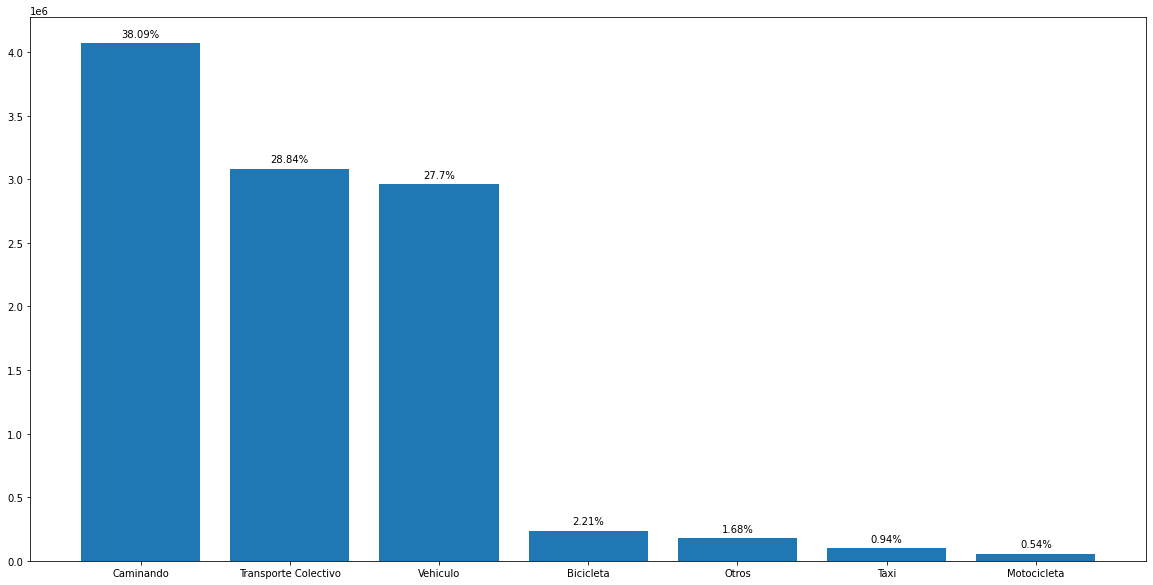

In [16]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.bar(totales.index, totales)
addlabels(porcentajes.keys(), totales, list(porcentajes.values()))
plt.show()

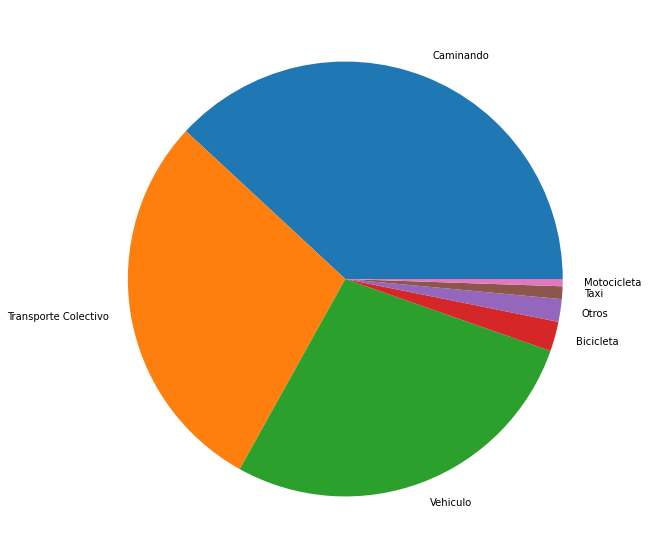

In [17]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.pie(totales.sort_values(ascending=False), labels = totales.sort_values(ascending=False).index)
plt.show()

In [3]:
pivotTab = pd.read_csv('./data/pruebasPivot.csv')
pivotTab

,OID_,Join_ID,codigo_act,Point_Count
0,1,1,311110,1
1,2,1,311613,1
2,3,1,311830,1
3,4,1,315192,1
4,5,1,316213,1
...,...,...,...,...
61663,61664,477,812410,1
61664,61665,477,813210,9
61665,61666,477,813230,1
61666,61667,477,931210,1


In [5]:
points = pivotTab.pivot_table(values = 'Point_Count', index = 'Join_ID', columns = 'codigo_act', aggfunc='sum', fill_value = 0).add_prefix('act_').reset_index()
points

codigo_act,Join_ID,act_112511,act_112512,act_114119,act_115111,act_115113,act_115119,act_115210,act_115310,act_212210,...,act_813230,act_931110,act_931210,act_931310,act_931410,act_931510,act_931610,act_931710,act_931810,act_932120
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,1,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,474,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,475,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,476,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
474,477,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [7]:
points.to_records(index = False)

rec.array([(  1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 1, 0, 0, 0,  0, 0, 0,  1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0, 0,  1, 0, 0, 0, 0, 0, 0, 0,  5, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0,   0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,  5, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,  5, 0, 0, 0, 1, 0, 0,  

In [23]:
points.to_csv('./data/tmp/pivot.csv')

In [24]:
pd.read_csv('./data/tmp/pivot.csv')

,Join_ID,act_112511,act_112512,act_114119,act_115111,act_115113,act_115119,act_115210,act_115310,act_212210,...,act_813230,act_931110,act_931210,act_931310,act_931410,act_931510,act_931610,act_931710,act_931810,act_932120
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,1,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,474,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,475,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,476,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
474,477,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [14]:
points.sum(axis = 1)

Join_ID
1       88
2      305
4       18
5        3
7       12
      ... 
474    354
475    590
476    235
477    490
478      1
Length: 476, dtype: int64

In [4]:
miBici = pd.read_csv('./data/tmp/mibici.csv')
miBici

,OID_,CODIGO_MZ,Point_Count
0,1,353,0
1,2,352,0
2,3,178,0
3,4,205,0
4,5,486,0
...,...,...,...
473,474,158,0
474,475,165,0
475,476,151,0
476,477,349,0


In [6]:

miBici

,OID_,CODIGO_MZ,Estaciones_Mi_Bici
0,1,353,0
1,2,352,0
2,3,178,0
3,4,205,0
4,5,486,0
...,...,...,...
473,474,158,0
474,475,165,0
475,476,151,0
476,477,349,0
